# **Twitter Sentiment Analysis**

# **Table Of Contents**

**1. Introduction and Data Preprocessing**
   - Project Overview
   - Data Collection
   - Data Cleaning and Preprocessing
     - Removing Special Characters and Punctuation
     - Tokenization
     - Handling Lower/Upper Case
     - Stop Word Removal
     - Handling Emojis and Symbols
     - Handling Abbreviations and Slang
     - Removing Duplicates
     - Handling Missing Values
     - Balancing the Dataset (if required)

**2. Data Inspection and Exploration**
   - Exploratory Data Analysis (EDA)
     - Distribution of Tweet Length
     - Class Distribution (Hate Speech vs. Non-Hate Speech)
     - Most Frequent Words (Word Cloud)
     - Analyzing Hashtags and Mentions

**3. Feature Engineering**
   - Introduction to Feature Extraction
   - Bag-of-Words (BoW)
     - Creating the BoW Model
     - Generating BoW Features
   - TF-IDF (Term Frequency-Inverse Document Frequency)
     - Creating the TF-IDF Model
     - Generating TF-IDF Features
   - Word Embeddings
     - Word2Vec or GloVe (if applicable)

**4. Model Building and Sentiment Analysis**
   - Introduction to Sentiment Analysis
   - Data Splitting (Train-Validation-Test Split)
   - Model Selection Criteria (Accuracy, Precision, Recall, F1-Score)
   - Building Sentiment Analysis Models:
     - Logistic Regression
     - Support Vector Machine (SVM)
     - Random Forest
     - XGBoost

**5. Model Fine-tuning and Evaluation**
   - Hyperparameter Tuning for Each Model
   - Cross-Validation and Grid Search
   - Model Evaluation
   - Confusion Matrix Analysis
   - Model Comparison
   - Feature Importance (if applicable)

**6. Summary and Conclusion**
   - Recap of Project Objectives
   - Key Findings and Insights
   - Model Selection and Performance
   - Future Work and Recommendations
   - Conclusion and Final Thoughts

# Introduction and Data Preprocessing

**Project Title: Twitter Sentiment Analysis for Hate Speech Detection**

**Problem Statement:**

In the age of social media, Twitter has become a prominent platform for users to express their thoughts, opinions, and emotions. Unfortunately, this freedom of expression can sometimes be misused, leading to the proliferation of hate speech, racism, and sexism in the digital space. The ability to automatically detect and classify such harmful content is crucial to maintaining a safe and inclusive online environment.

The objective of this project is to develop a machine learning model for Twitter sentiment analysis with a focus on detecting hate speech. Specifically, we aim to classify tweets into two categories: those containing racist or sexist sentiments and those that do not. By doing so, we hope to contribute to a safer and more respectful online community while reducing the harmful impact of hate speech.

**Project Description:**

**Background:**
Hate speech on social media platforms is a significant issue that not only affects individuals but also has broader social implications. Twitter, being one of the most popular platforms for sharing thoughts and ideas, is not immune to this problem. Hate speech in tweets can lead to cyberbullying, harassment, and the spread of harmful ideologies, creating a hostile digital environment. To address this issue, we propose a Twitter Sentiment Analysis project with a focus on hate speech detection.

**Objectives:**
The primary objectives of this project are as follows:

1. Develop a robust machine learning model that can accurately classify tweets into two categories: those containing racist or sexist sentiments and those that do not.

2. Preprocess and clean the Twitter data, handling challenges such as slang, emojis, and noisy text to improve the model's performance.

3. Implement natural language processing (NLP) techniques to extract relevant features from tweets, such as keywords, context, and sentiment.

4. Explore and select appropriate algorithms and techniques for text classification, considering factors like deep learning, traditional machine learning, and ensemble methods.

5. Train the model on a diverse dataset of tweets that includes examples of hate speech and non-hate speech to ensure generalization and robust performance.

6. Evaluate the model using appropriate metrics, such as accuracy, precision, recall, and F1-score, to measure its effectiveness in detecting hate speech.

7. Implement the model in a real-time or batch processing pipeline to continuously monitor and classify tweets, helping Twitter and its users identify and address hate speech.

8. Provide interpretability tools to help understand how and why the model classifies tweets as hate speech, allowing for transparency and potential model improvements.

**Expected Impact:**
The successful completion of this project will have a positive impact on Twitter and its user community in several ways:

1. Enhanced Safety: By automatically identifying and flagging hate speech, Twitter can take appropriate actions, including content moderation and user warnings, to maintain a safer environment.

2. Improved User Experience: Users will experience a reduction in exposure to offensive content, making their interactions on Twitter more positive and enjoyable.

3. Facilitation of Content Moderation: Twitter's content moderation teams can benefit from the automated classification of tweets, allowing them to prioritize and respond to reported hate speech more efficiently.

4. Compliance with Regulations: In some regions, there are legal requirements to combat hate speech. This project can assist Twitter in fulfilling its legal responsibilities.

Overall, the Twitter Sentiment Analysis for Hate Speech Detection project aims to harness the power of machine learning and NLP to mitigate the negative effects of hate speech on Twitter and promote a more inclusive and respectful online community.

## Importing Libraries

In [3]:
import re # regular expression
import pandas as pd
pd.set_option('display.max_colwidth', 100) # to extend the column width
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)


## Reading Datasets

In [4]:
train_data=pd.read_csv('Data/train_data.csv')
test_data=pd.read_csv('Data/test_data.csv')
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [5]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs ...
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ð..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


## Data Inspection

* Looking non hate speeh

In [6]:
train_data[train_data['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get ther...
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #ha...
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


* Checking some Hate Speech

In [7]:
train_data[train_data['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedol...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xen...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting o...
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #p...


In [8]:
train_data.shape

(31962, 3)

In [9]:
test_data.shape

(17197, 2)

Train set has 31,962 tweets and test set has 17,197 tweets.

In [11]:
train_data['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In the train dataset, we have 2,242 (~7%) tweets labeled as racist or sexist, and 29,720 (~93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

**Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.**

In [14]:
plt.style.use('dark_background')

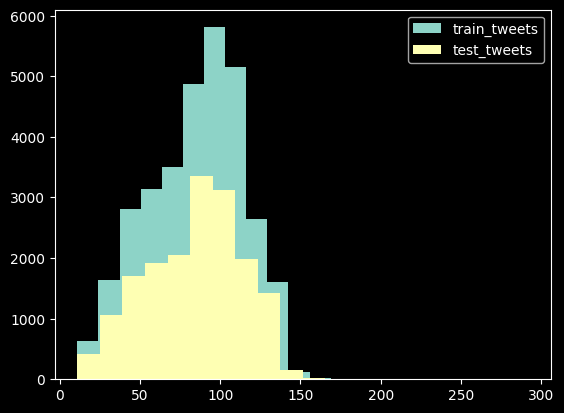

In [15]:
length_train = train_data['tweet'].str.len()
length_test = test_data['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

The tweet-length distribution is more or less the same in both train and test data.

## Data Cleaning

In [17]:
train_data=pd.DataFrame(train_data)
test_data=pd.DataFrame(test_data)

In [19]:
full_data=train_data._append(test_data,ignore_index=True)
full_data.shape

(49159, 3)

In [21]:
full_data

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never on..."
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work ..."


* Removing unwanted text from tweet

In [22]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [23]:
full_data['tidy_tweet'] = np.vectorize(remove_pattern)(full_data['tweet'], "@[\w]*")

In [24]:
full_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapoi...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


* Removing Special Chracter

In [25]:
full_data['tidy_tweet'] = full_data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [26]:
full_data.head(11)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapoi...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get ther...,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get ther...
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #ha...,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #ha...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so #gr8 !


* Removing Sort words

In [27]:
full_data['tidy_tweet'] = full_data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [28]:
full_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...,when father dysfunctional selfish drags kids into dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...,thanks #lyft credit can't cause they don't offer wheelchair vans pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


**To Be Continue...**